In [100]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [101]:
df = pd.read_csv('ADBL.csv')
df.head

<bound method NDFrame.head of             Date  Total Transactions  Total Traded Shares  \
0     2014-05-11                  40                 2232   
1     2014-05-12                  41                 6393   
2     2014-05-13                  26                 3367   
3     2014-05-15                  19                 1498   
4     2014-05-18                  29                 2406   
...          ...                 ...                  ...   
1232  2019-09-01                  76                17893   
1233  2019-09-02                 164                43531   
1234  2019-09-03                 113                36698   
1235  2019-09-04                 102                22525   
1236  2019-09-05                  71                15371   

      Total Traded Amount  Max. Price  Min. Price  Close Price  
0                 1005475       462.0         446        451.0  
1                 2858303       453.0         442        447.0  
2                 1527250       460.0     

In [102]:
df.shape

(1237, 7)

In [ ]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Close Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [104]:
df.shape

(1237, 7)

In [105]:
data = df.filter(['Close Price'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

990

In [106]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.4168207 ],
       [0.41312384],
       [0.41774492],
       ...,
       [0.39186691],
       [0.39371534],
       [0.39279113]])

In [107]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.4168207 , 0.41312384, 0.41774492, 0.41589649, 0.40480591,
       0.40757856, 0.40665434, 0.40573013, 0.40757856, 0.40665434,
       0.40573013, 0.40850277, 0.42051756, 0.41497227, 0.42513863,
       0.4297597 , 0.41589649, 0.4168207 , 0.41127542, 0.40850277,
       0.4168207 , 0.42421442, 0.42144177, 0.46025878, 0.46580407,
       0.        , 0.46580407, 0.45933457, 0.45471349, 0.44916821,
       0.45286506, 0.45286506, 0.49445471, 0.49445471, 0.48983364,
       0.48613678, 0.49907579, 0.50831793, 0.52772643, 0.58040665,
       0.60998152, 0.62569316, 0.64510166, 0.63770795, 0.63770795,
       0.6987061 , 0.67375231, 0.67097967, 0.68391867, 0.66081331,
       0.65619224, 0.64972274, 0.64602588, 0.64232902, 0.6284658 ,
       0.62014787, 0.6090573 , 0.60073937, 0.60720887, 0.60073937])]
[0.6053604436229205]

[array([0.4168207 , 0.41312384, 0.41774492, 0.41589649, 0.40480591,
       0.40757856, 0.40665434, 0.40573013, 0.40757856, 0.40665434,
       0.40573013, 0.40850277, 0.420

In [108]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [109]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(930, 60, 1)

In [110]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [111]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [112]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
930/930 [==============================] - 55s 59ms/step - loss: 0.0036


In [113]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [114]:
x_test = np.array(x_test)


In [115]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [116]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [117]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

18.108878366570725

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


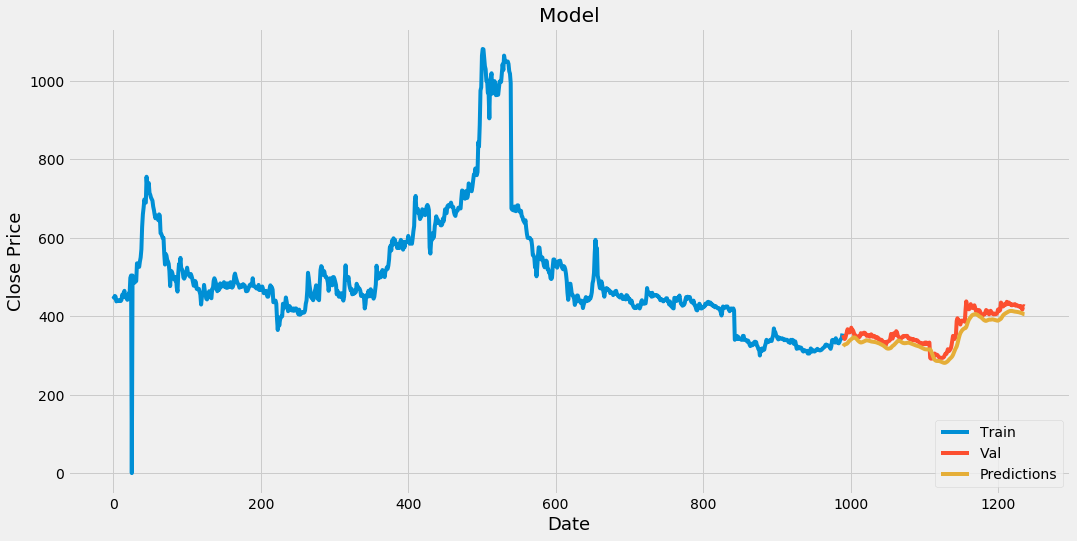

In [118]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [119]:
valid

,Close Price,Predictions
990,352.0,323.657288
991,346.0,326.080902
992,342.0,327.804016
993,345.0,328.619812
994,352.0,329.112610
...,...,...
1232,421.0,408.374084
1233,417.0,407.609528
1234,424.0,406.365234
1235,426.0,405.608307


In [120]:
#Create a new dataframe
apple_quote= pd.read_csv('ADBL.csv')

new_df = apple_quote.filter(['Close Price'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[405.34702]]
